In [1]:
import pandas as pd
import numpy as np

file_path = "./Data.csv"

data = []
data = pd.read_csv(file_path) # Reading Initial Data
data.head()

,AGE,GENDER,BTHUS,CTZDUAL,CTZUSIN,BSDGN,MRDGRUS,MARIND,LFSTAT,EDDAD_1,...,FACSAL_1,FACSAL_2,FACSAL_3,FACSAL_4,FACSAL_L,FACSEC_1,FACSEC_2,FACSEC_3,FACSEC_4,FACSEC_L
0,40.0,False,True,False,True,3.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
1,40.0,True,True,False,True,2.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
2,34.0,True,True,False,True,2.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
3,46.0,False,True,False,True,1.0,True,False,True,0,...,0,1,0,0,0,0,1,0,0,0
4,32.0,True,True,False,True,2.0,True,True,True,0,...,0,1,0,0,0,0,1,0,0,0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
X = data.drop('LFSTAT', axis=1)  # predictor variables
y = data['LFSTAT']  # target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
classifier = LogisticRegression(max_iter=1000)  # Increase the max_iter parameter

In [10]:
rfe = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')

In [11]:
rfe.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

In [12]:
selected_features = X.columns[rfe.support_]

In [13]:
y_pred = rfe.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', selected_features)

Model accuracy: 0.9603196026561572
Optimal number of features : 92
Best features : Index(['AGE', 'GENDER', 'BTHUS', 'CTZDUAL', 'CTZUSIN', 'BSDGN', 'MRDGRUS',
       'MARIND', 'EDDAD_1', 'EDDAD_2', 'EDDAD_3', 'EDDAD_4', 'EDDAD_5',
       'EDDAD_7', 'EDDAD_8', 'EDMOM_1', 'EDMOM_2', 'EDMOM_3', 'EDMOM_4',
       'EDMOM_6', 'EDMOM_7', 'EDMOM_8', 'VETSTAT_0', 'VETSTAT_1', 'VETSTAT_2',
       'VETSTAT_3', 'RACEM_1', 'RACEM_2', 'RACEM_3', 'RACEM_4', 'RACEM_5',
       'RACEM_6', 'BACARN_0', 'BACARN_11', 'BACARN_12', 'BACARN_13',
       'BACARN_14', 'BACARN_22', 'BACARN_31', 'BACARN_32', 'BACARN_40',
       'BACARN_51', 'BACARN_52', 'BACARN_53', 'BACARN_54', 'BACARN_56',
       'BACARN_59', 'BACARN_60', 'DGRDG_1', 'DGRDG_2', 'DGRDG_3', 'DGRDG_4',
       'FACADV_1', 'FACADV_2', 'FACADV_3', 'FACADV_4', 'FACADV_L', 'FACBEN_1',
       'FACBEN_2', 'FACBEN_3', 'FACBEN_4', 'FACBEN_L', 'FACCHAL_1',
       'FACCHAL_2', 'FACCHAL_3', 'FACCHAL_4', 'FACCHAL_L', 'FACIND_1',
       'FACIND_2', 'FACIND_3', 'FAC

In [15]:
coefficients = rfe.estimator_.coef_[0]

# Map coefficients to the selected features
feature_importance = pd.DataFrame({
    'Feature': X.columns[rfe.support_],
    'Coefficient': coefficients
})

# Display the feature importances sorted by absolute values of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print(feature_importance)

      Feature  Coefficient  Absolute Coefficient
67   FACIND_1     0.956469              0.956469
87   FACSEC_1     0.911547              0.911547
41  BACARN_51    -0.821758              0.821758
44  BACARN_54     0.815368              0.815368
24  VETSTAT_2     0.781789              0.781789
..        ...          ...                   ...
70   FACIND_4     0.031158              0.031158
34  BACARN_12     0.023713              0.023713
4     CTZUSIN    -0.020543              0.020543
0         AGE    -0.019008              0.019008
47  BACARN_60     0.018788              0.018788

[92 rows x 3 columns]


In [16]:
feature_importance.to_csv('docs.csv', index = False)

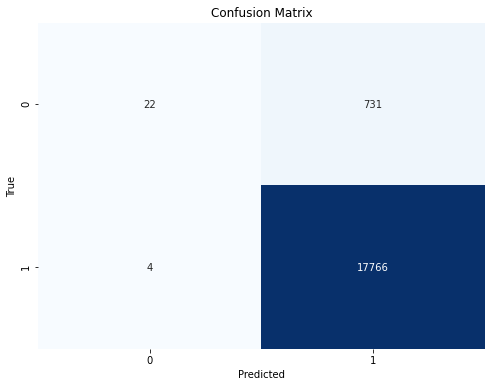

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.03      0.06       753
        True       0.96      1.00      0.98     17770

    accuracy                           0.96     18523
   macro avg       0.90      0.51      0.52     18523
weighted avg       0.96      0.96      0.94     18523



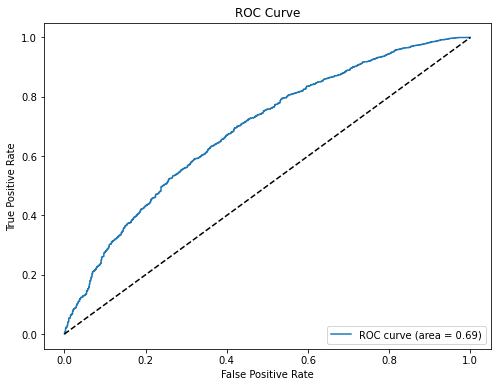

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC Curve and AUC
if y.nunique() == 2:  # Checking if the target variable is binary
    y_prob = rfe.predict_proba(X_test)[:, 1]  # probability estimates for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC and AUC are not applicable for multi-class targets.")
